# Exploration of factors related to Availability_Rate 

**Introduction** In this section, the data preparation would be divided into three steps: data cleaning, data transformation and data visualization. 

1. **Data cleaning** 
- Null-value
- Missing value
- Duplicates
- Special Symbol like stripping dollar, comma character
2. **Data transformtion** 
- String->Date
- 0/1 -> Bollean
- String -> Float
- Extract month and year from date string and rewrite values
3. **Visualization** 
- Visualization of Room Type and availability_rate
- Visualization of accommodates and availability_rate
- Visualization of neighbourhood
- Visualization of Amenities Num
- Visualization of different room type,property type and vailability_rate

**Research Question**
- figure the relationship among availability_rate and host_response_rate,monthly_price,amenities_sum,neighbourhood,calendar_updated

**Research Model**
- Linear Regression
- Random Forest



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
Calendar = pd.read_csv("D:/project/Fourth/Data Mining/Project/archive/calendar.csv")
listings_df = pd.read_csv("D:/project/Fourth/Data Mining/Project/archive/listings.csv")
reviews_df = pd.read_csv("D:/project/Fourth/Data Mining/Project/archive/reviews.csv")

## Data Cleaning

In [3]:
Calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [5]:
#describe the count of the data 
Calendar.describe(include='object')

,date,available,price
count,1308890,1308890,643037
unique,365,2,1246
top,2017-09-05,f,$150.00
freq,3586,665853,20752


In [6]:
#Drop the duplicate values
Calendar.drop_duplicates()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


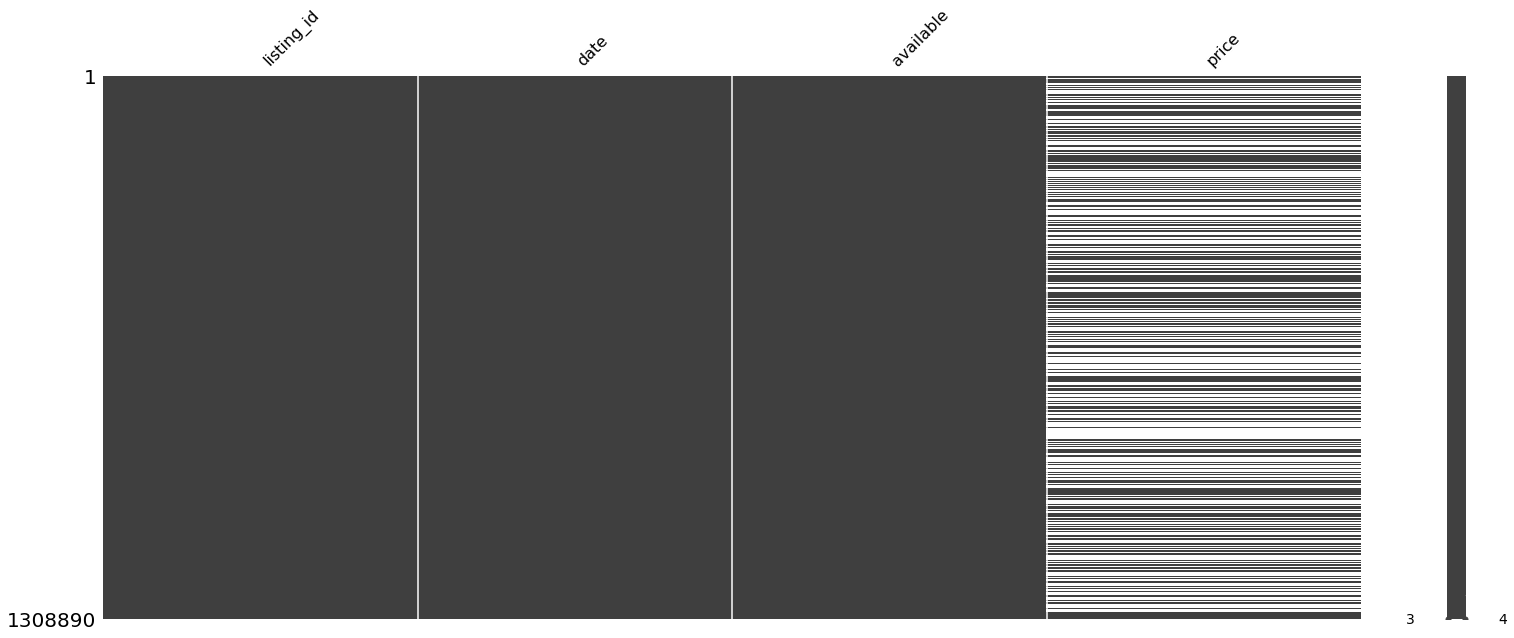

In [7]:
#Visualization of the null value in calendar.csv
import missingno as msno

msno.matrix(Calendar);

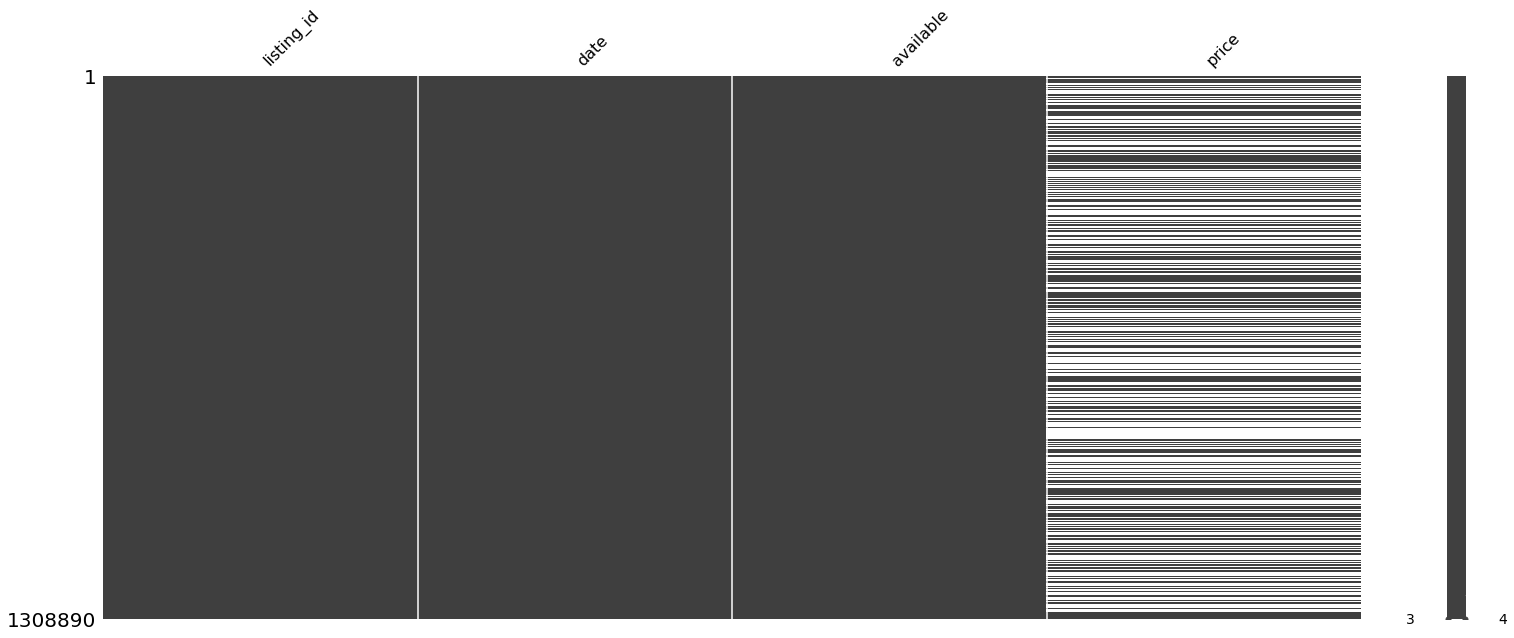

In [8]:
#Visualization of the null value in calendar.csv
msno.matrix(Calendar);

In [9]:
# Extract month and year from date string and rewrite values

Calendar['date'] = pd.to_datetime(Calendar.date)
    
month = Calendar['date'].dt.month
month = month.replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Septempber', 10:'October', 11:'November', 12:'December'})
 
year =Calendar['date'].dt.year
    
Calendar['Month'] = month
Calendar['Year'] = year

In [10]:
#Show 10 lines of Calendar
Calendar.sample(10)

,listing_id,date,available,price,Month,Year
1200369,4261781,2016-12-05,t,$200.00,December,2016
384986,9430774,2016-12-03,f,NaN,December,2016
866150,7362715,2017-08-31,f,NaN,August,2017
19472,12535687,2017-05-01,t,$110.00,May,2017
155721,13531200,2016-11-03,t,$70.00,November,2016
1188961,13586491,2016-12-11,t,$98.00,December,2016
115756,743211,2017-07-16,t,$550.00,July,2017
990410,4180178,2017-03-24,t,$60.00,March,2017
329325,7161203,2017-04-28,t,$35.00,April,2017
587645,9698226,2016-09-10,f,NaN,Septempber,2016


In [11]:
# convert string date to datetime object
Calendar.date = pd.to_datetime(Calendar.date)

In [12]:
# Convert boolean t/f columns to 1/0 columns
boolean_columns = ['available']
for column in boolean_columns:
    Calendar[column] =  Calendar[column].apply(lambda val: True if val=='t' else False)

In [13]:
#Show 10 lines of Calendar
Calendar.sample(10)

,listing_id,date,available,price,Month,Year
290262,12351909,2017-04-19,False,NaN,April,2017
1228821,3897963,2017-07-02,True,$75.00,July,2017
674861,12648403,2016-09-29,False,NaN,Septempber,2016
682446,4995033,2016-12-18,False,NaN,December,2016
1263775,12409042,2017-01-28,False,NaN,January,2017
1266419,12736032,2016-12-12,False,NaN,December,2016
1023356,8899828,2017-06-02,False,NaN,June,2017
480430,1329627,2017-04-16,False,NaN,April,2017
1090944,7367795,2016-10-16,False,NaN,October,2016
77337,9463444,2016-10-18,False,NaN,October,2016


In [14]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  bool          
 3   price       643037 non-null   object        
 4   Month       1308890 non-null  object        
 5   Year        1308890 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(2)
memory usage: 51.2+ MB


In [15]:
listings_df.shape

(3585, 95)

In [16]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [17]:
reviews_df.shape
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [18]:
# listings_csv.dtypes
listings_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [19]:
reviews_df.set_index('id', inplace=True)

In [20]:
# convert string date to datetime object in reviews set
reviews_df.date = pd.to_datetime(reviews_df.date)

In [21]:
# test
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 4724140 to 98550693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  int64         
 1   date           68275 non-null  datetime64[ns]
 2   reviewer_id    68275 non-null  int64         
 3   reviewer_name  68275 non-null  object        
 4   comments       68222 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.1+ MB


In [22]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [23]:
listings_df.set_index('id', inplace=True)

In [24]:
listings_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [25]:
# convert string dates to datetime objects
listings_df.last_scraped = pd.to_datetime(listings_df.last_scraped)

In [26]:
# convert price column to float type after stripping dollar, comma character
listings_df.price = listings_df.price.str.lstrip('$').str.replace(',', '').astype('float')

In [27]:
# drop columns with no recordings

listings_df.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'],
                 axis=1, inplace=True)

In [28]:
# drop rows with price <= 0, bathrooms < 1, bedrooms <=0, accommodates <= 0

listings_df = listings_df[listings_df.price > 0]
listings_df = listings_df[listings_df.bathrooms >= 1]
listings_df = listings_df[listings_df.bedrooms > 0]
listings_df = listings_df[listings_df.accommodates > 0]

In [29]:
# replace float values to lower value in bathroom column

listings_df['bathrooms'] = listings_df.bathrooms.replace(1.5, 1)
listings_df['bathrooms'] = listings_df.bathrooms.replace(2.5, 2)
listings_df['bathrooms'] = listings_df.bathrooms.replace(3.5, 3)
listings_df['bathrooms'] = listings_df.bathrooms.replace(4.5, 4)

In [30]:
# convert bedrooms, bathrooms, accommodates count to int from float
listings_df.bedrooms = listings_df.bedrooms.astype('int')
listings_df.bathrooms = listings_df.bathrooms.astype('int')
listings_df.accommodates = listings_df.accommodates.astype('int')

In [31]:
# clean city column

listings_df.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Brighton', 'Brighton ',
       'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan',
       'Milton', 'Dorchester', 'dorchester, boston ', 'South Boston',
       'Allston', 'ALLSTON'], dtype=object)

In [32]:
listings_df[listings_df.city=='波士顿']

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
4625517,https://www.airbnb.com/rooms/4625517,20160906204935,2016-09-07,GreenT&bus stops in front of door,Super convenient :30 seconds walk to Green T a...,"Awesome area of Brookline&Boston, one block fr...",Super convenient :30 seconds walk to Green T a...,none,Connivence to almost everywhere- penguins piz...,"If you are a student, I may give you 5% off.If...",...,NaN,NaN,NaN,f,f,strict,f,f,1,NaN


In [33]:
# drop row with unusual city name since there is only with observation associated with it

listings_df.drop(index=4625517, inplace=True)
listings_df.shape

(3254, 90)

In [34]:
listings_df['city_cleansed'] = listings_df.city.copy()

In [35]:
# replace all duplicate entries

listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ALLSTON', 'Allston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('dorchester, boston ', 'Dorchester')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('east Boston ', 'East Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Brighton ', 'Brighton')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [36]:
# replace all duplicate entries

listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ALLSTON', 'Allston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('dorchester, boston ', 'Dorchester')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('east Boston ', 'East Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Brighton ', 'Brighton')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [37]:
listings_df.city_cleansed.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Jamaica Plain, MA', 'Mission Hill, Boston',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'Charlestown', 'Somerville', 'Brighton', nan,
       'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan', 'Milton',
       'Dorchester', 'South Boston', 'Allston'], dtype=object)

In [38]:
listings_df.fillna(0, inplace=True)

In [39]:
# test
listings_df.shape

(3254, 91)

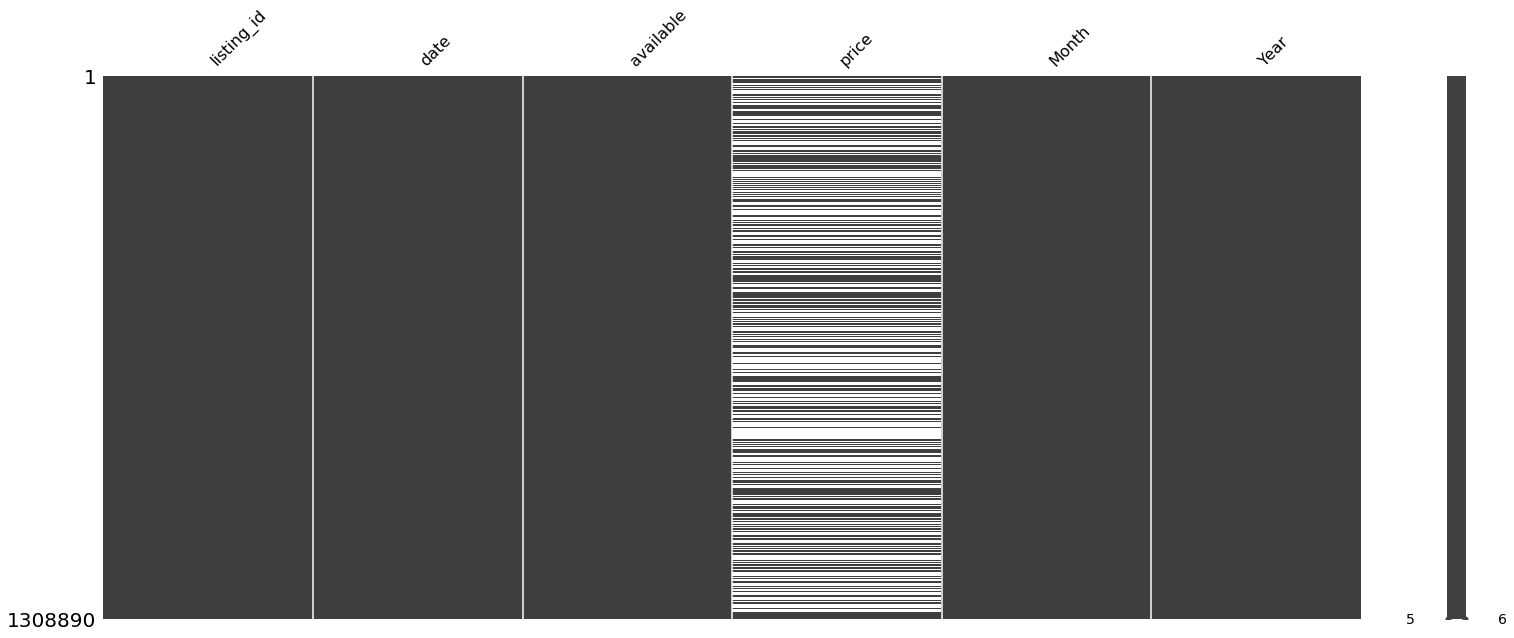

In [40]:
#Visualization of the null value in calendar.csv
msno.matrix(Calendar);

In [41]:
#Show the availability of each month in Boston
new = Calendar.groupby(['Month']).count()[['listing_id']].sort_values(by = 'listing_id', ascending = False)
new

,listing_id
Month,
August,111166
December,111166
January,111166
July,111166
March,111166
May,111166
October,111166
April,107580
June,107580


In [42]:
#Calculate the number of amenities owned by the listings
listings_df['availability_rate']=listings_df.availability_30/30

listings_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,city_cleansed,availability_rate
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",0,...,0.0,f,f,moderate,f,f,1,0.00,Boston,0.000000
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,t,moderate,f,f,1,1.30,Boston,0.866667
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,f,moderate,t,f,1,0.47,Boston,0.633333
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,f,moderate,f,f,1,1.00,Boston,0.200000
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,f,flexible,f,f,1,2.25,Boston,0.433333


In [43]:
listings_df['availability_rate']=listings_df.availability_30/30

## Data Visualization

In [44]:
features_df = listings_df.copy()
# checking if the target label has all entries recorded
features_df.price.count()
# categorizing number of listings with room type
room_type_count = features_df.room_type.value_counts()
room_type_count

Entire home/apt    1825
Private room       1353
Shared room          76
Name: room_type, dtype: int64

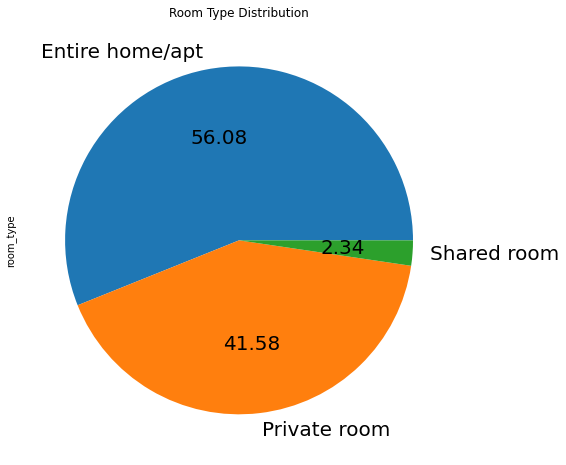

In [45]:
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');
#From the chart it can be conclued that three are three types of room in the airbnb

### Visualization Busy Month

Text(0, 0.5, 'availability')

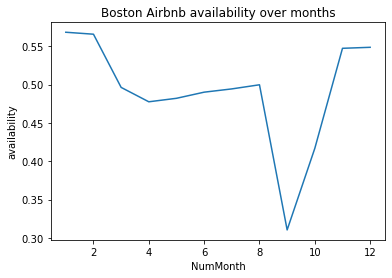

In [46]:
#Visualization the availability of each month in Boston
#Sep and Otc have the lowest availability rate which suggests these are the busiest time of the year to visit Boston
Nummonth = Calendar['date'].dt.month
Calendar['NumMonth'] = Nummonth
calendardf_copy=Calendar.copy()
Calmonth = Calendar['date'].dt.month
ax1 = calendardf_copy.groupby(['NumMonth'])['available'].mean().plot(title='Boston Airbnb availability over months')
ax1.set_ylabel("availability")

### Visualization of neighbourhood

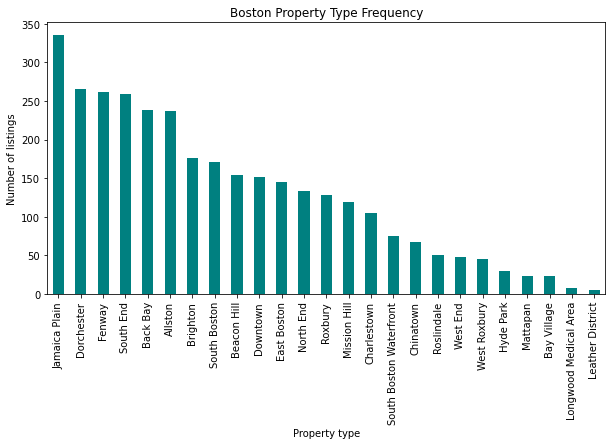

In [47]:
# clean property type column
features_df.property_type.unique()
features_df = features_df[features_df.property_type != 0]
# number of listings based on the property type
property_type_count = features_df.neighbourhood_cleansed.value_counts()
property_type_count
property_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Boston Property Type Frequency')
plt.xlabel('Property type');
plt.ylabel('Number of listings');

### Visualization of Room Type and availability_rate

In [48]:
# analyzing the availability_rate for different room type and property type

availability_data = features_df.groupby(['neighbourhood_cleansed','room_type']).availability_rate.mean()
availability_data

neighbourhood_cleansed  room_type      
Allston                 Entire home/apt    0.188066
                        Private room       0.185778
                        Shared room        0.494444
Back Bay                Entire home/apt    0.380737
                        Private room       0.216667
                                             ...   
West End                Entire home/apt    0.755556
                        Private room       0.211111
West Roxbury            Entire home/apt    0.300000
                        Private room       0.422989
                        Shared room        0.883333
Name: availability_rate, Length: 69, dtype: float64

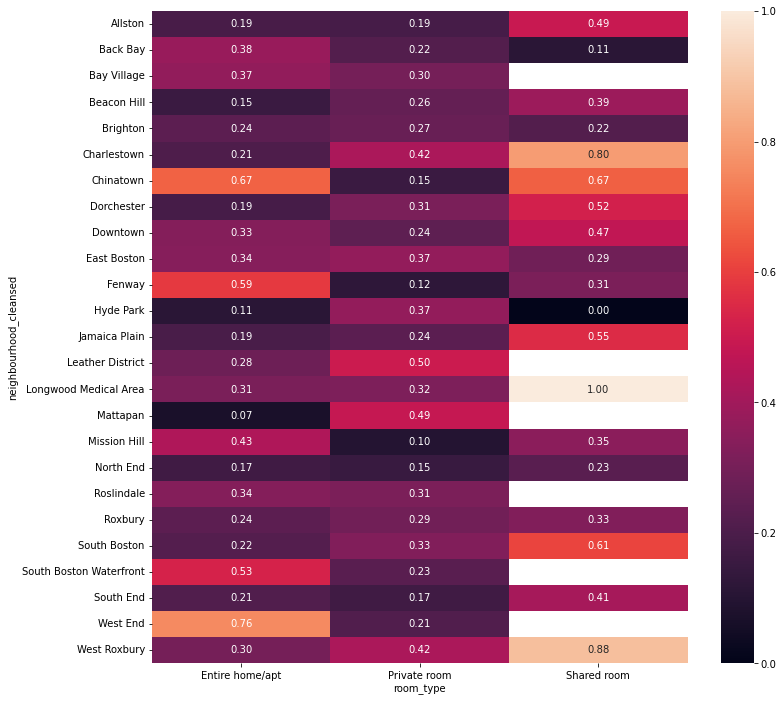

In [49]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['neighbourhood_cleansed', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#1. In Boston the Townhouse with entire room, Guest house with Entire home/apt and Boat with Private room are the properties with maximum prices
#2. The apartment and the House are the most popular among the us

In [50]:
# clean property type column
features_df.accommodates.unique()
features_df = features_df[features_df.accommodates != 0]
# number of listings based on the accommodates type
acc_type_count = features_df.accommodates.value_counts()
acc_type_count

2     1262
4      623
1      413
3      373
5      244
6      202
8       55
7       38
10      18
9       10
12       5
11       4
14       3
16       2
Name: accommodates, dtype: int64

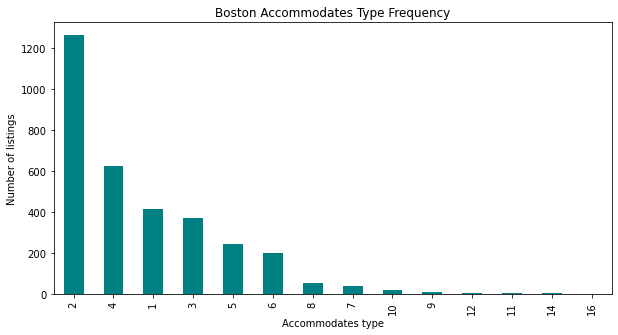

In [51]:
acc_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Boston Accommodates Type Frequency')
plt.xlabel('Accommodates type');
plt.ylabel('Number of listings');

### Visualization of accommodates and availability_rate

In [52]:
# analyzing the availability_rate for different room type and property type

prices_data = features_df.groupby(['accommodates','room_type']).availability_rate.mean()
prices_data

accommodates  room_type      
1             Entire home/apt    0.242857
              Private room       0.241434
              Shared room        0.459350
2             Entire home/apt    0.209683
              Private room       0.259778
              Shared room        0.358065
3             Entire home/apt    0.404437
              Private room       0.270513
              Shared room        0.000000
4             Entire home/apt    0.263722
              Private room       0.257576
              Shared room        0.700000
5             Entire home/apt    0.549351
              Private room       0.484615
6             Entire home/apt    0.275500
              Private room       0.500000
7             Entire home/apt    0.426126
              Private room       1.000000
8             Entire home/apt    0.335256
              Private room       0.655556
9             Entire home/apt    0.393333
10            Entire home/apt    0.296296
11            Entire home/apt    0.450000
12  

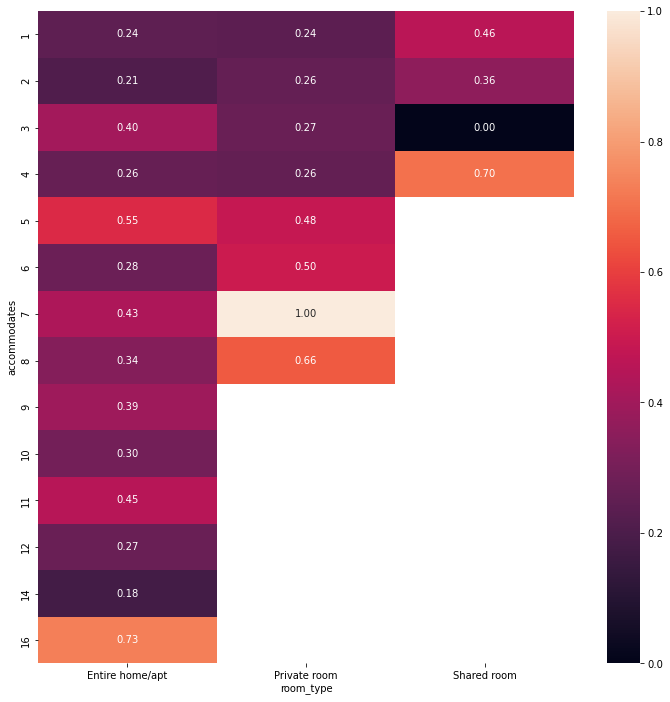

In [53]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['accommodates', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#The accommodates also has the influence on the price.
#1. In Boston the highest price of the accommodates
#

### Visualization of  different room type,property type and vailability_rate

In [54]:
# clean property type column
features_df.price.unique()
features_df = features_df[features_df.price != 0]
# number of listings based on the accommodates type
acc_type_count = features_df.price.value_counts()
acc_type_count

150.0    108
200.0    106
100.0     94
250.0     93
75.0      90
        ... 
464.0      1
385.0      1
479.0      1
276.0      1
459.0      1
Name: price, Length: 317, dtype: int64

In [55]:
price_df = listings_df.copy()
price_df['price_range']=price_df.price
price_df.price_range = price_df.price_range.astype('int')
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>=0) & (price_df['price_range']<=100)].tolist(), 1)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>100) & (price_df['price_range']<=200)].tolist(), 2)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>200) & (price_df['price_range']<=300)].tolist(), 3)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>300) & (price_df['price_range']<=400)].tolist(), 4)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>400) & (price_df['price_range']<=500)].tolist(), 5)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>500) & (price_df['price_range']<=600)].tolist(), 6)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>600) & (price_df['price_range']<=700)].tolist(), 7)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>700) & (price_df['price_range']<=800)].tolist(), 8)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>800) & (price_df['price_range']<=900)].tolist(), 9)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>900) & (price_df['price_range']<=1000)].tolist(), 10)
# number of listings based on the accommodates type
price_type_count = price_df.price_range.value_counts()
price_type_count

1       1186
2       1119
3        607
4        219
5         57
6         28
7         17
8          5
10         4
9          2
1250       2
1400       1
1300       1
1235       1
1345       1
1372       1
4000       1
1275       1
3000       1
Name: price_range, dtype: int64

In [56]:
price_drop=price_df['price_range'].where(cond = ((price_df.price_range==1250)|(price_df.price_range==1400)|(price_df.price_range==1300)|(price_df.price_range==1372)|(price_df.price_range==1235)|(price_df.price_range==1345)|(price_df.price_range==4000)|(price_df.price_range==1275)|(price_df.price_range==3000))).dropna()
print(price_drop)

id
6093430     1400.0
8303267     1300.0
10882267    1250.0
14758045    1235.0
14798673    1345.0
6451456     1372.0
12972378    4000.0
12962229    1275.0
12679021    3000.0
14291722    1250.0
Name: price_range, dtype: float64


In [57]:
price_df=price_df.drop(index=10882267) #利用drop方法将含有特定数值的列删除
price_df=price_df.drop(index=14758045)
price_df=price_df.drop(index=14798673)
price_df=price_df.drop(index=6451456)
price_df=price_df.drop(index=12972378)
price_df=price_df.drop(index=12962229)
price_df=price_df.drop(index=12679021)
price_df=price_df.drop(index=14291722)

In [58]:
# number of listings based on the accommodates type
price_type_count = price_df.price_range.value_counts()
price_type_count

1       1186
2       1119
3        607
4        219
5         57
6         28
7         17
8          5
10         4
9          2
1400       1
1300       1
Name: price_range, dtype: int64

In [59]:
# analyzing the availability_rate for different room type and property type

prices_data = price_df.groupby(['price_range','room_type']).availability_rate.mean()
prices_data

price_range  room_type      
1            Entire home/apt    0.128205
             Private room       0.242618
             Shared room        0.402525
2            Entire home/apt    0.243717
             Private room       0.318246
             Shared room        0.529630
3            Entire home/apt    0.366143
             Private room       0.250980
4            Entire home/apt    0.552632
             Private room       0.213333
5            Entire home/apt    0.427778
             Private room       0.644444
6            Entire home/apt    0.301190
7            Entire home/apt    0.494118
8            Entire home/apt    0.200000
             Shared room        0.000000
9            Entire home/apt    0.000000
             Private room       0.000000
10           Entire home/apt    0.333333
             Private room       1.000000
1300         Entire home/apt    0.466667
1400         Private room       0.000000
Name: availability_rate, dtype: float64

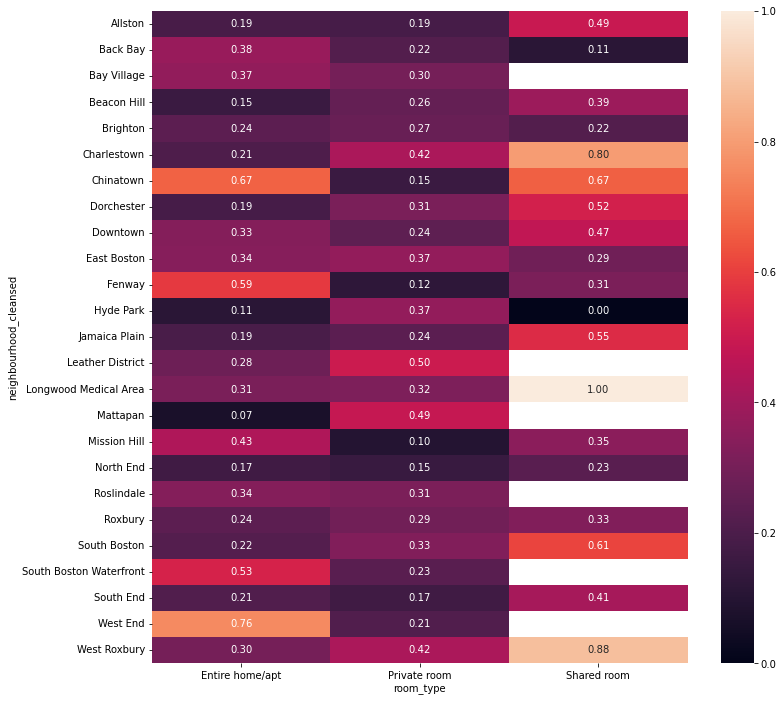

In [60]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['neighbourhood_cleansed', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#1. In Boston the Townhouse with entire room, Guest house with Entire home/apt and Boat with Private room are the properties with maximum prices
#2. The apartment and the House are the most popular among the users

### Visualization of price_range and vailability_rate

price_range
1       0.241484
2       0.264999
3       0.359692
4       0.537139
5       0.439181
6       0.301190
7       0.494118
8       0.160000
9       0.000000
10      0.500000
1300    0.466667
1400    0.000000
Name: availability_rate, dtype: float64


Text(0.5, 1.0, '')

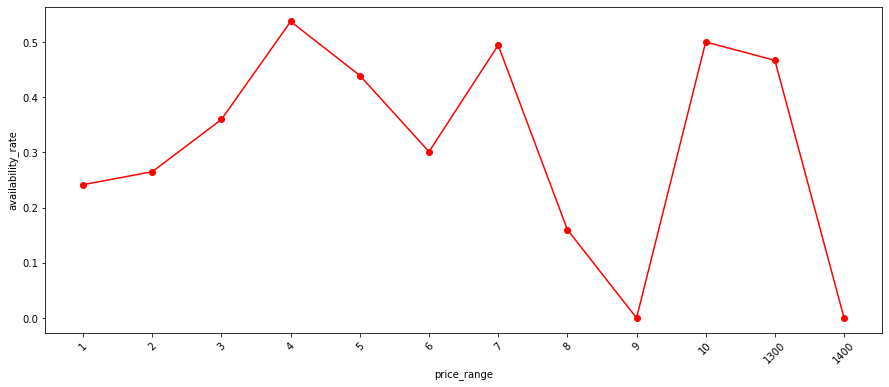

In [61]:
price_zhexiantu=  price_df.groupby(['price_range']).availability_rate.mean().dropna()
print(price_zhexiantu)
zhexiantu = price_zhexiantu.index
x = range(len(zhexiantu))
plt.figure(figsize=(15,6))
plt.xticks(x, zhexiantu, rotation=45)
plt.plot(x,price_zhexiantu.values, 'ro-')
plt.xlabel('price_range')
plt.ylabel('availability_rate');
plt.title('')

### Visualization of review_scores_rating and vailability_rate

In [62]:
# analyzing the prices for different room type and property type

prices_data = features_df.groupby(['review_scores_rating','room_type']).availability_rate.mean()
prices_data

review_scores_rating  room_type      
0.0                   Entire home/apt    0.419147
                      Private room       0.253785
                      Shared room        0.625000
20.0                  Entire home/apt    1.000000
                      Private room       0.050000
                                           ...   
99.0                  Entire home/apt    0.245455
                      Private room       0.208772
100.0                 Entire home/apt    0.253251
                      Private room       0.211489
                      Shared room        0.348718
Name: availability_rate, Length: 102, dtype: float64

In [63]:
price_df['rating_range']=price_df.review_scores_rating
price_df.rating_range = price_df.rating_range.astype('int')
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>=0) & (price_df['rating_range']<=10)].tolist(), 1)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>10) & (price_df['rating_range']<=20)].tolist(), 2)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>20) & (price_df['rating_range']<=30)].tolist(), 3)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>30) & (price_df['rating_range']<=40)].tolist(), 4)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>40) & (price_df['rating_range']<=50)].tolist(), 5)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>50) & (price_df['rating_range']<=60)].tolist(), 6)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>60) & (price_df['rating_range']<=70)].tolist(), 7)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>70) & (price_df['rating_range']<=80)].tolist(), 8)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>80) & (price_df['rating_range']<=90)].tolist(), 9)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>90) & (price_df['rating_range']<=100)].tolist(), 10)
# number of listings based on the accommodates type
rating_type_count = price_df.rating_range.value_counts()
rating_type_count

10    1723
1      743
9      489
8      204
6       32
7       31
4       11
5        7
2        6
Name: rating_range, dtype: int64

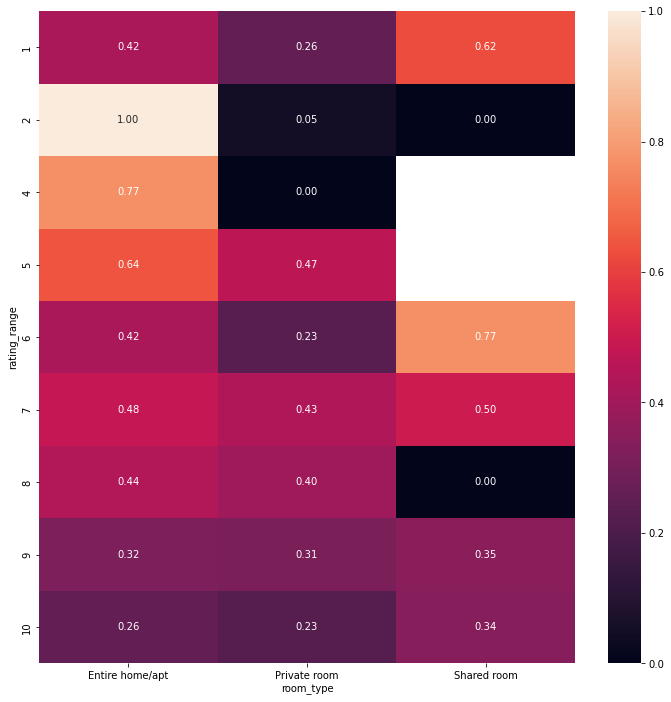

In [64]:
plt.figure(figsize=(12,12));
sns.heatmap(price_df.groupby(['rating_range', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#The accommodates also has the influence on the price.
#1. In Boston the highest price of the accommodates
#

### Visualization of host_response_rate and vailability_rate

In [65]:
# analyzing the prices for different room type and property type

prices_data = features_df.groupby(['host_response_rate','room_type']).availability_rate.mean()
prices_data

host_response_rate  room_type      
0                   Entire home/apt    0.063610
                    Private room       0.074037
                    Shared room        0.393939
0%                  Entire home/apt    0.333333
                    Private room       0.470833
                                         ...   
98%                 Entire home/apt    0.805952
                    Private room       0.382222
                    Shared room        0.600000
99%                 Entire home/apt    0.433333
                    Private room       0.220513
Name: availability_rate, Length: 102, dtype: float64

In [66]:
price_df['response_range']=price_df.review_scores_rating
price_df.rating_range = price_df.rating_range.astype('int')
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>=0) & (price_df['response_range']<=10)].tolist(), 1)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>10) & (price_df['response_range']<=20)].tolist(), 2)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>20) & (price_df['response_range']<=30)].tolist(), 3)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>30) & (price_df['response_range']<=40)].tolist(), 4)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>40) & (price_df['response_range']<=50)].tolist(), 5)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>50) & (price_df['response_range']<=60)].tolist(), 6)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>60) & (price_df['response_range']<=70)].tolist(), 7)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>70) & (price_df['response_range']<=80)].tolist(), 8)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>80) & (price_df['response_range']<=90)].tolist(), 9)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>90) & (price_df['response_range']<=100)].tolist(), 10)
# number of listings based on the accommodates type
response_type_count = price_df.response_range.value_counts()
response_type_count

10.0    1723
1.0      743
9.0      489
8.0      204
6.0       32
7.0       31
4.0       11
5.0        7
2.0        6
Name: response_range, dtype: int64

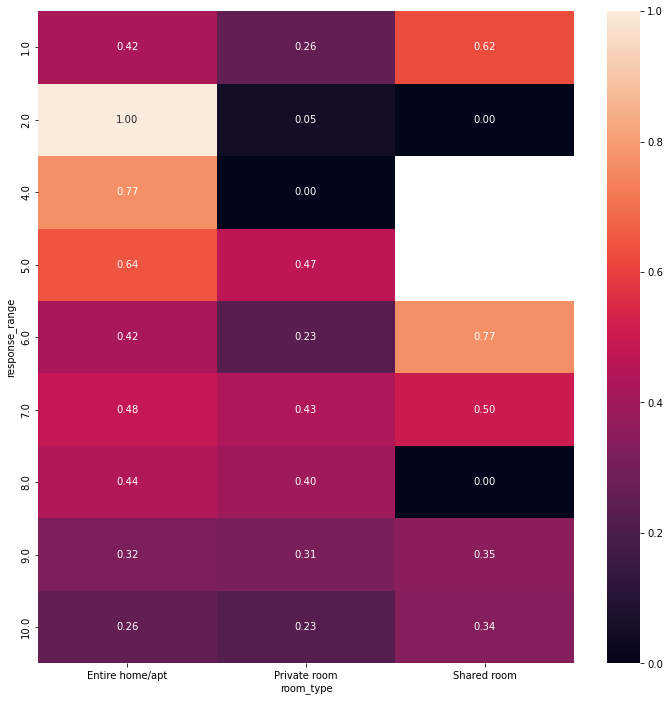

In [67]:
plt.figure(figsize=(12,12));
sns.heatmap(price_df.groupby(['response_range', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#The accommodates also has the influence on the price.
#1. In Boston the highest price of the accommodates
#

### Visualization of security_deposit and vailability_rate

In [68]:
# analyzing the prices for different room type and property type

prices_data = features_df.groupby(['security_deposit','room_type']).availability_rate.mean()
prices_data

security_deposit  room_type      
0                 Entire home/apt    0.370674
                  Private room       0.243816
                  Shared room        0.408743
$1,000.00         Entire home/apt    0.197674
                  Private room       0.453333
                                       ...   
$95.00            Entire home/apt    0.333333
                  Private room       0.316129
                  Shared room        0.000000
$950.00           Private room       0.950000
$99.00            Entire home/apt    0.369697
Name: availability_rate, Length: 83, dtype: float64

In [69]:
price_df.security_deposit = price_df.security_deposit.astype('str')
import re
price_df.security_deposit = price_df.security_deposit.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)

In [70]:
price_df['deposit_range']=price_df.security_deposit
price_df.deposit_range = price_df.deposit_range.astype('int')
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>=0) & (price_df['deposit_range']<=100)].tolist(), 1)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>100) & (price_df['deposit_range']<=200)].tolist(), 2)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>200) & (price_df['deposit_range']<=300)].tolist(), 3)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>300) & (price_df['deposit_range']<=400)].tolist(), 4)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>400) & (price_df['deposit_range']<=500)].tolist(), 5)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>500) & (price_df['deposit_range']<=600)].tolist(), 6)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>600) & (price_df['deposit_range']<=700)].tolist(), 7)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>700) & (price_df['deposit_range']<=800)].tolist(), 8)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>800) & (price_df['deposit_range']<=900)].tolist(), 9)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>900) & (price_df['deposit_range']<=1000)].tolist(), 10)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>1000)].tolist(), 11)
# number of listings based on the accommodates type
deposit_type_count = price_df.deposit_range.value_counts()
deposit_type_count

1     2338
2      264
3      232
5      220
4      100
10      50
11      19
8       12
6        9
7        2
Name: deposit_range, dtype: int64

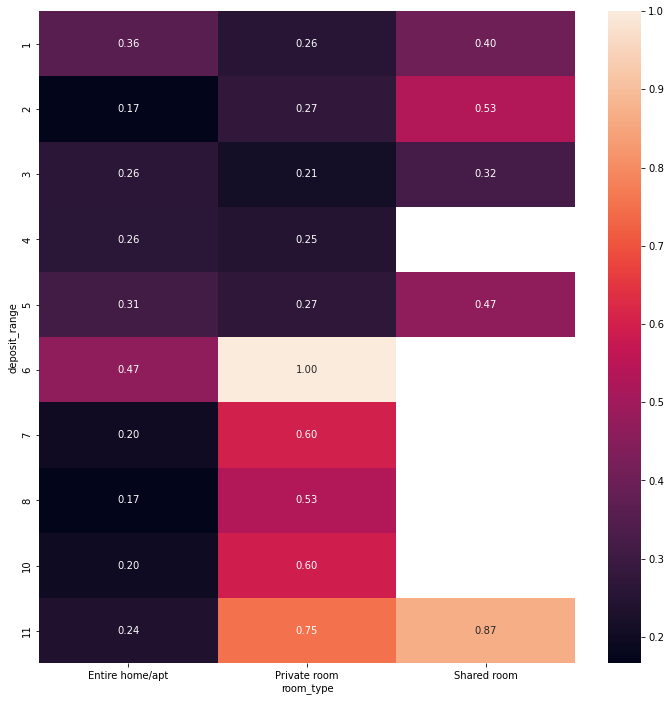

In [71]:
plt.figure(figsize=(12,12));
sns.heatmap(price_df.groupby(['deposit_range', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#The accommodates also has the influence on the price.
#1. In Boston the highest price of the accommodates
#

### Visualization of cleaning_fee and vailability_rate

In [72]:
price_df.cleaning_fee = price_df.cleaning_fee.astype('str')
import re
price_df.cleaning_fee = price_df.cleaning_fee.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)

In [73]:
# analyzing the prices for different room type and property type

cleaning_data = price_df.groupby(['cleaning_fee','room_type']).availability_rate.mean()
cleaning_data

cleaning_fee  room_type      
0.0           Entire home/apt    0.215167
              Private room       0.252807
              Shared room        0.378571
5.0           Entire home/apt    0.000000
              Private room       0.170940
                                   ...   
225.0         Entire home/apt    0.093333
              Private room       0.250000
230.0         Private room       1.000000
250.0         Entire home/apt    0.230952
300.0         Entire home/apt    0.750000
Name: availability_rate, Length: 127, dtype: float64

In [74]:
price_df['cleaning_range']=price_df.cleaning_fee
price_df.deposit_range = price_df.deposit_range.astype('int')
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>=0) & (price_df['cleaning_range']<=50)].tolist(), 1)
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>50) & (price_df['cleaning_range']<=100)].tolist(), 2)
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>100) & (price_df['cleaning_range']<=150)].tolist(), 3)
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>150) & (price_df['cleaning_range']<=200)].tolist(), 4)
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>200) & (price_df['cleaning_range']<=250)].tolist(), 5)
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>250) & (price_df['cleaning_range']<=300)].tolist(), 6)
# number of listings based on the accommodates type
cleaning_type_count = price_df.cleaning_range.value_counts()
cleaning_type_count

1.0    2187
2.0     774
3.0     202
4.0      59
5.0      22
6.0       2
Name: cleaning_range, dtype: int64

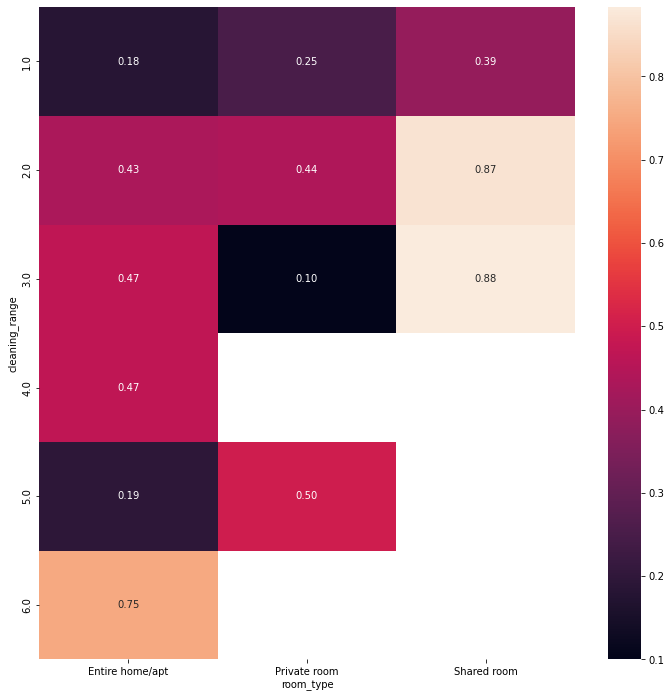

In [75]:
plt.figure(figsize=(12,12));
sns.heatmap(price_df.groupby(['cleaning_range', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#The accommodates also has the influence on the price.
#1. In Boston the highest price of the accommodates
#

### Visualization of Amenities Num

In [76]:
from sklearn.preprocessing import MultiLabelBinarizer

# Change datatype:Split String
amenities = listings_df.amenities.map(lambda ele: [amenity_list.replace('"', '').replace('{', '').replace('}', '').replace('/', '') for amenity_list in ele.split(',')])
amenities

#Data frame mapping
mlb = MultiLabelBinarizer()
fit = pd.DataFrame(mlb.fit_transform(amenities), columns=mlb.classes_, index=amenities.index)

In [77]:
# Combine ameamenities to listing data:
listings_df = pd.concat([listings_df, fit], axis = 1, sort = False)
listings_df.sample(5)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
id,,,,,,,,,,,,,,,,,,,,,
9607296,https://www.airbnb.com/rooms/9607296,20160906204935,2016-09-07,Be our Guest in Boston,Our home is located on a fairly quiet street i...,0,Our home is located on a fairly quiet street i...,none,0,0,...,1,0,0,0,0,0,0,1,0,0
14756184,https://www.airbnb.com/rooms/14756184,20160906204935,2016-09-07,1BD in Shared Apartment,1 bedroom in a shared apartment unit. All new ...,0,1 bedroom in a shared apartment unit. All new ...,none,0,0,...,1,0,0,1,1,0,0,1,0,0
13434817,https://www.airbnb.com/rooms/13434817,20160906204935,2016-09-07,Two Bedroom Kenmore Square,This is a great apartment for a group. You're ...,"This is an apartment in a central, classic bui...",This is a great apartment for a group. You're ...,none,0,0,...,1,0,0,1,1,0,0,1,0,0
7678756,https://www.airbnb.com/rooms/7678756,20160906204935,2016-09-07,Renovated 1 Bed near Airport,Totally renovated 1st floor 1 bedroom condomin...,"It's a fantastic 1 bedroom, much nicer than an...",Totally renovated 1st floor 1 bedroom condomin...,none,"Best kept secret in Boston! Amazing food, park...",You can park on the street for free except dur...,...,1,0,0,1,1,0,0,1,0,0
12366845,https://www.airbnb.com/rooms/12366845,20160906204935,2016-09-07,Convenient 3bd Near Downtown,This Location is 15-minute Walk to Andrew stat...,0,This Location is 15-minute Walk to Andrew stat...,none,0,0,...,0,0,0,0,1,0,0,0,0,1


In [78]:
#The most popular 10 amenities
amenitie = fit
amenitie.sum().sort_values(ascending = False)[:10]

Wireless Internet    3115
Heating              3070
Kitchen              2978
Essentials           2764
Smoke Detector       2658
Air Conditioning     2538
Internet             2373
TV                   2350
Washer               2266
Dryer                2263
dtype: int64

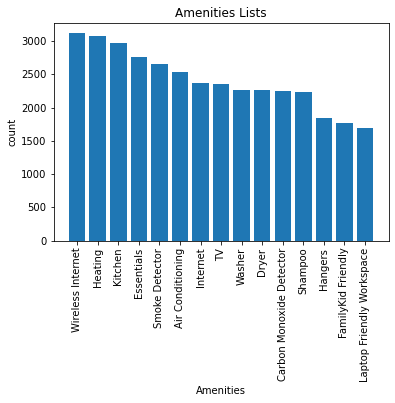

In [79]:
# Plot Amenities Lists:
amen = fit.sum().sort_values(ascending = False)[:15]
plt.bar(amen.index, amen.values)
plt.title('Amenities Lists')
plt.xlabel('Amenities')
plt.ylabel('count')
plt.xticks(rotation = 90);

In [80]:
#Calculate the number of amenities owned by the listings
listings_df['amenities_sum']=fit.sum(axis=1)


In [81]:
# The relationship between the number of listings and the number of amenities sum
amenities_sum_count = listings_df.amenities_sum.value_counts()
amenities_sum_count


19    276
16    271
15    268
17    262
18    253
14    224
13    191
20    184
12    184
21    179
11    161
22    144
23    111
10    110
9      81
24     63
8      63
25     47
7      39
1      30
5      23
26     21
27     21
6      20
4      11
3       6
2       5
28      3
30      1
29      1
31      1
Name: amenities_sum, dtype: int64

<BarContainer object of 10 artists>

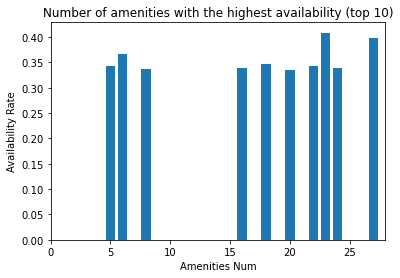

In [82]:
# Relationship between number of amenities and availabilit (positive)
plt.title('Number of amenities with the highest availability (top 10)')
plt.xlabel('Amenities Num')
plt.ylabel('Availability Rate')

X_axis=listings_df.amenities_sum.value_counts().where(cond = (listings_df.amenities_sum.value_counts()>=20)).dropna()
plt.xlim((0,X_axis.index.max()+1)) # Determine the range of the X-axis

amen_score =  listings_df.groupby(['amenities_sum'])['availability_rate'].mean().where(cond = (listings_df.amenities_sum.value_counts()>=20)).dropna().sort_values(ascending = False)[:10]
plt.bar(amen_score.index, amen_score.values)

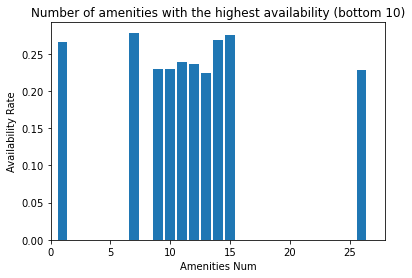

In [83]:
plt.title('Number of amenities with the highest availability (bottom 10)')
plt.xlabel('Amenities Num')
plt.ylabel('Availability Rate')

X_axis=listings_df.amenities_sum.value_counts().where(cond = (listings_df.amenities_sum.value_counts()>=20)).dropna()
plt.xlim((0,X_axis.index.max()+1)) # Determine the range of the X-axis

amen_score =  listings_df.groupby(['amenities_sum'])['availability_rate'].mean().where(cond = (listings_df.amenities_sum.value_counts()>=20)).dropna().sort_values(ascending = True)[:10]
plt.bar(amen_score.index, amen_score.values);

## Linear Regression

### This Chapter uses the Linear Regression model to figure the relationship among
 availability_rate and host_response_rate,monthly_price,amenities_sum,neighbourhood,calendar_updated
 
#### 'y' --->availability_rate
#### 'x' --->host_response_rate,monthly_price,amenities_sum,neighbourhood,calendar_updated

#### Then set the test_size=0.20, random_state=45
Fit X_train, y_train to get the R2 score is 0.1769579409285018
#### The result shows there is not any Linear correlation among then


In [84]:
# Create new list from listing_data(only int and float)

num = ['availability_rate','host_response_rate','monthly_price','amenities_sum']
listings_df.dropna(subset=['cleaning_fee'], inplace=True)
listings_df.cleaning_fee = listings_df.cleaning_fee.astype('str')
import re
listings_df.cleaning_fee = listings_df.cleaning_fee.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)
listings_df.dropna(subset=['extra_people'], inplace=True)
listings_df.extra_people = listings_df.extra_people.astype('str')
import re
listings_df.extra_people = listings_df.extra_people.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)
listings_df.dropna(subset=['host_response_rate'], inplace=True)
listings_df.host_response_rate = listings_df.host_response_rate.astype('str')
import re
listings_df.host_response_rate = listings_df.host_response_rate.apply(
    lambda value: re.sub(r'\%|,', '', value)
).astype(float)
listings_df.dropna(subset=['monthly_price'], inplace=True)
listings_df.monthly_price = listings_df.monthly_price.astype('str')
import re
listings_df.monthly_price = listings_df.monthly_price.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)

In [85]:
data1 = listings_df.select_dtypes(include=['int32','int64', 'float64'])[num]

In [86]:
# Create new list from listing_data(only Object)

cat = ['neighbourhood','calendar_updated']

In [87]:
data1[cat] = listings_df[cat]
d_data = data1.copy()
new_data = pd.get_dummies(d_data)
new_data = new_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [88]:
y = new_data['availability_rate']
X = new_data.drop('availability_rate',  axis =1 )

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [90]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
import seaborn as sb

from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

In [91]:
# Linear Regression Model:

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.1769579409285018

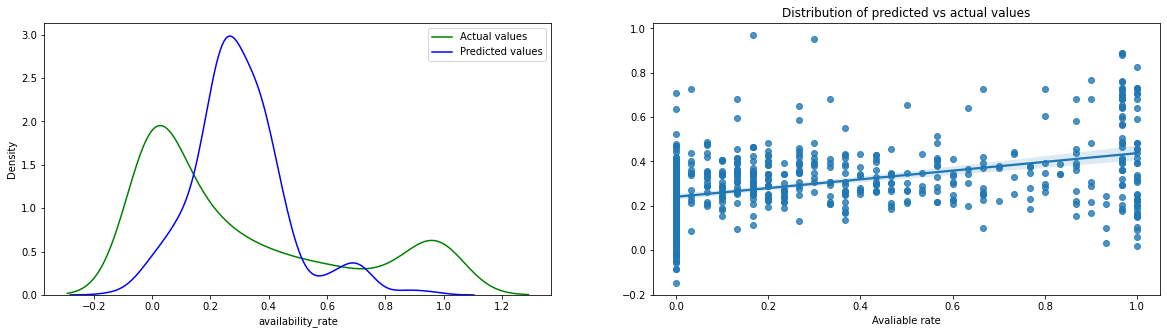

In [92]:
# Plot predicted and original values:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_pred, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_pred)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Avaliable rate');

In [93]:
import sklearn.metrics as sklm #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    # R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.
    # https://statisticsbyjim.com/regression/interpret-r-squared-regression/
    print('R^2                    = ' + str(r2))

y_pred = reg.predict(X_test) 
print_metrics(y_test, y_pred) 

Mean Square Error      = 0.10350988566285782
Root Mean Square Error = 0.3217295225229693
Mean Absolute Error    = 0.2558973987891672
Median Absolute Error  = 0.21976372742898262
R^2                    = 0.1769579409285018


## Random Forest

### ***This Chapter uses the Random Forest model to figure the relationship among***
 *availability_rate* 
*host_response_rate,monthly_price,amenities_sum,neighbourhood,calendar_updated*

##### 'y' --->availability_rate
##### 'x' --->host_response_rate,monthly_price,amenities_sum,neighbourhood,calendar_updated


#### Then set the random_state =42
Fit X_train, y_train to get the R2 score is 0.3338729440287239
#### It shows there is not any Classification relation

#### Then use GridSearch to adjust the parameter get the  test r2:0.275
 Mean Square Error      = 0.09114738416406988
 Root Mean Square Error = 0.30190625062106596
 Mean Absolute Error    = 0.21406144088459755
 Median Absolute Error  = 0.14375000000000007
 R^2                    = 0.27525636550581667

#### Then we use the Figure to show the most relative elements:
##### host_response_rate and  amenities_sum

In [94]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators = 100,oob_score = True,n_jobs = -1,random_state =42,max_features='auto',min_samples_leaf = 12)
ran.fit(X_train, y_train)
y_preds = ran.predict(X_test)
r2_score(y_test, y_preds)

0.3338729440287239

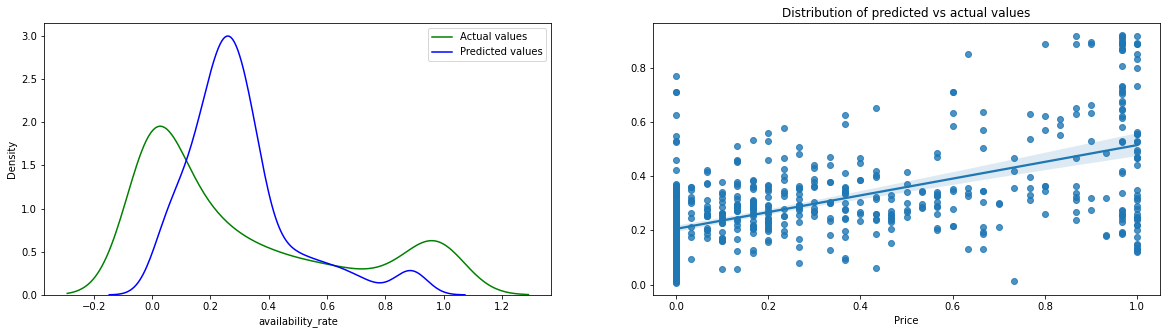

In [95]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_preds, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_preds)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

In [96]:
from sklearn.model_selection import GridSearchCV
#GridSearch to adjust the parameter
rfc=RandomForestRegressor()
param = {"n_estimators": range(1,20),"min_samples_leaf": range(1,20)}     #Adjust the parameter
gs = GridSearchCV(estimator=rfc,param_grid=param,cv=5)
gs.fit(X_train,y_train)    

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': range(1, 20),
                         'n_estimators': range(1, 20)})

In [97]:
#Export the parameter
best_score=gs.best_score_
best_params=gs.best_params_
print(best_score,best_params,end='\n')

0.25668987427919576 {'min_samples_leaf': 11, 'n_estimators': 17}


In [98]:
#Adjust the parameter then evaluation
rf=RandomForestRegressor(n_estimators = 16,oob_score = True,n_jobs = -1,random_state =42,max_features='auto',min_samples_leaf = 1)
rf.fit(X_train,y_train)
predictions= rf.predict(X_test)
print("train r2:%.3f"%r2_score(y_train,rf.predict(X_train)))         #Evaluation
print("test r2:%.3f"%r2_score(y_test,predictions)) 

train r2:0.829
test r2:0.275


D:\project\Anacdona\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


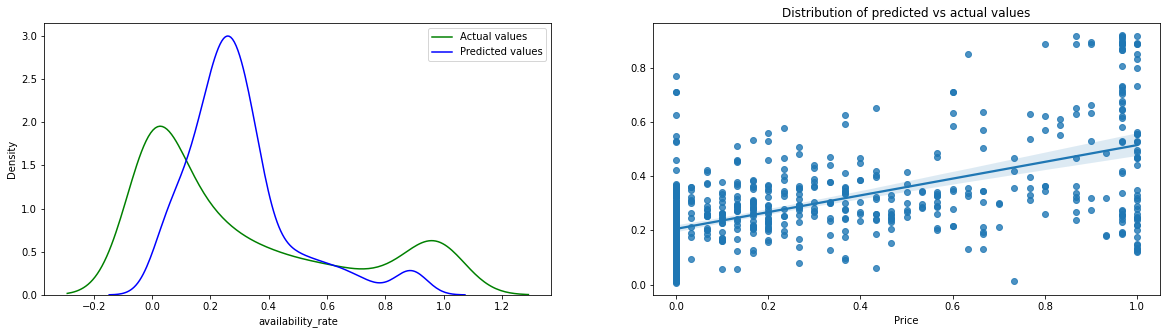

In [99]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_preds, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_preds)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

In [100]:
import sklearn.metrics as sklm #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    # R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.
    # https://statisticsbyjim.com/regression/interpret-r-squared-regression/
    print('R^2                    = ' + str(r2))

y_pred = rf.predict(X_test) 
print_metrics(y_test, y_pred) 

Mean Square Error      = 0.09114738416406988
Root Mean Square Error = 0.30190625062106596
Mean Absolute Error    = 0.21406144088459758
Median Absolute Error  = 0.14375000000000002
R^2                    = 0.27525636550581667


In [101]:
feature_list = list(X.columns) 

importances = list(rf.feature_importances_)    
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list,importances)]     
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)                
[print('Variable: {:12} Importance: {}'.format(*pair)) for pair in feature_importances]            

Variable: amenities_sum Importance: 0.21
Variable: host_response_rate Importance: 0.19
Variable: monthly_price Importance: 0.15
Variable: neighbourhood_0 Importance: 0.02
Variable: neighbourhood_Allston-Brighton Importance: 0.02
Variable: neighbourhood_Fenway/Kenmore Importance: 0.02
Variable: neighbourhood_Jamaica Plain Importance: 0.02
Variable: neighbourhood_South End Importance: 0.02
Variable: neighbourhood_West End Importance: 0.02
Variable: calendar_updated_a week ago Importance: 0.02
Variable: calendar_updated_never Importance: 0.02
Variable: calendar_updated_today Importance: 0.02
Variable: neighbourhood_Back Bay Importance: 0.01
Variable: neighbourhood_Beacon Hill Importance: 0.01
Variable: neighbourhood_Charlestown Importance: 0.01
Variable: neighbourhood_Dorchester Importance: 0.01
Variable: neighbourhood_East Boston Importance: 0.01
Variable: neighbourhood_Hyde Park Importance: 0.01
Variable: neighbourhood_Mattapan Importance: 0.01
Variable: neighbourhood_Mission Hill Impor

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

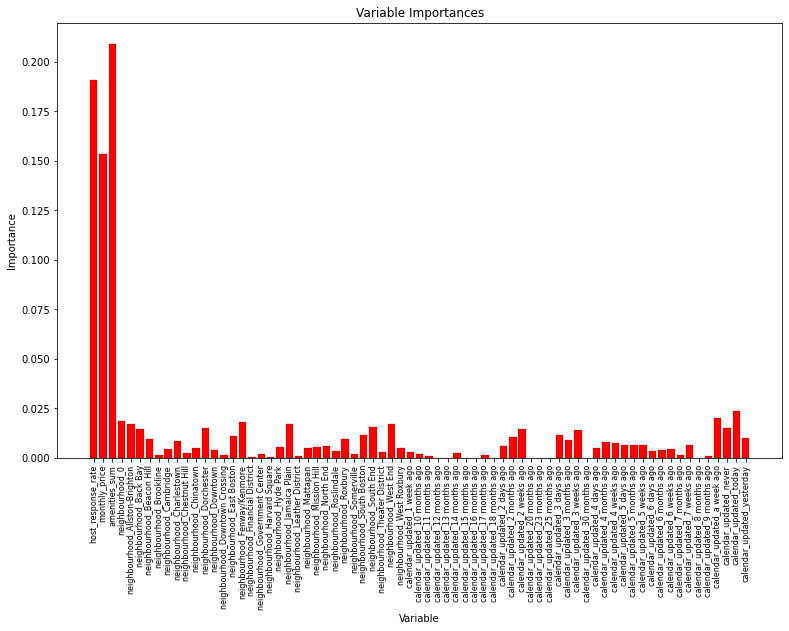

In [102]:
#Draw
f,ax = plt.subplots(figsize = (13,8))    #Picture size
x_values = list(range(len(importances)))     
plt.bar(x_values,importances, orientation = 'vertical', color = 'r',edgecolor = 'k',linewidth =0.2)    #Draw picture
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical',fontsize=8)      
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [103]:
# Show the attribute of the importance
importances_df = pd.DataFrame()
importances_df["Feature Name"]=feature_list
importances_df["Feature Importance"]=importances
p=importances_df.sort_values("Feature Importance",ascending=False)
print(importances_df)

                      Feature Name  Feature Importance
0               host_response_rate            0.190705
1                    monthly_price            0.153328
2                    amenities_sum            0.209161
3                  neighbourhood_0            0.018615
4   neighbourhood_Allston-Brighton            0.016894
..                             ...                 ...
66   calendar_updated_9 months ago            0.001127
67     calendar_updated_a week ago            0.020200
68          calendar_updated_never            0.015096
69          calendar_updated_today            0.023587
70      calendar_updated_yesterday            0.010026

[71 rows x 2 columns]


In [104]:
lost_result=list(p['Feature Name'][:15])                
print(lost_result)

['amenities_sum', 'host_response_rate', 'monthly_price', 'calendar_updated_today', 'calendar_updated_a week ago', 'neighbourhood_0', 'neighbourhood_Fenway/Kenmore', 'neighbourhood_West End', 'neighbourhood_Jamaica Plain', 'neighbourhood_Allston-Brighton', 'neighbourhood_South End', 'calendar_updated_never', 'neighbourhood_Dorchester', 'neighbourhood_Back Bay', 'calendar_updated_2 weeks ago']
